In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
import glob

from rubin_scheduler.scheduler.utils import EuclidOverlapFootprint

In [2]:
out_dir = 'temp'
results_db = maf.db.ResultsDb(out_dir=out_dir)


In [3]:
files = ['../baseline/baseline_v3.4_10yrs.db'] + glob.glob('early_ss*.db')

In [4]:
nside = 128

fpg = EuclidOverlapFootprint(nside=nside)
maps, labels = fpg.return_maps()

hpid = np.where(labels == 'nes')[0]
results = []

image_results = []

for filename in files:
    run_name = os.path.basename(filename).replace('.db', '')
    filters = ['g', 'r', 'i', 'z']
    for filtername in filters:
        bundle_list = []
        metric = maf.TemplateTime()
        slicer = maf.HealpixSubsetSlicer(nside, hpid)
        summary_stats = [maf.MedianMetric()]
        sql = "filter = '%s' and visitExposureTime > 19" % filtername
        bundle_list.append(maf.MetricBundle(metric, slicer, sql, run_name=run_name, summary_metrics=summary_stats))
        bd = maf.metricBundles.make_bundles_dict_from_list(bundle_list)
        bg = maf.metricBundles.MetricBundleGroup(bd, filename, out_dir=out_dir, results_db=results_db)
        bg.run_all()

        results.append([run_name, filtername, bd['TemplateTime_N_nights_without_template'].summary_values['Median']])

        image_results.append([run_name, filtername, bd['TemplateTime_N_images_until_template'].summary_values['Median']])


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slic

In [5]:
results = pd.DataFrame(results)
results

0  1      2
0                       baseline_v3.4_10yrs  g  380.0
1                       baseline_v3.4_10yrs  r   50.0
2                       baseline_v3.4_10yrs  i  101.0
3                       baseline_v3.4_10yrs  z  368.0
4   early_ss_template_fpextra3.0_v3.4_10yrs  g   34.0
5   early_ss_template_fpextra3.0_v3.4_10yrs  r   34.0
6   early_ss_template_fpextra3.0_v3.4_10yrs  i   39.0
7   early_ss_template_fpextra3.0_v3.4_10yrs  z   70.0
8   early_ss_template_fpextra1.5_v3.4_10yrs  g   35.0
9   early_ss_template_fpextra1.5_v3.4_10yrs  r   36.0
10  early_ss_template_fpextra1.5_v3.4_10yrs  i   42.0
11  early_ss_template_fpextra1.5_v3.4_10yrs  z   80.0
12  early_ss_template_fpextra5.0_v3.4_10yrs  g   36.0
13  early_ss_template_fpextra5.0_v3.4_10yrs  r   30.0
14  early_ss_template_fpextra5.0_v3.4_10yrs  i   38.0
15  early_ss_template_fpextra5.0_v3.4_10yrs  z   47.0
16  early_ss_template_fpextra2.0_v3.4_10yrs  g   31.0
17  early_ss_template_fpextra2.0_v3.4_10yrs  r   34.0
18  early_ss_template_fpextra2.0_v3.4_10yrs  i   41.0
19  early_ss_template_fpextra2.0_v3.4_10yrs  z   60.0

In [6]:
image_results = pd.DataFrame(image_results)
image_results

0  1    2
0                       baseline_v3.4_10yrs  g  5.0
1                       baseline_v3.4_10yrs  r  5.0
2                       baseline_v3.4_10yrs  i  6.0
3                       baseline_v3.4_10yrs  z  5.0
4   early_ss_template_fpextra3.0_v3.4_10yrs  g  6.0
5   early_ss_template_fpextra3.0_v3.4_10yrs  r  5.0
6   early_ss_template_fpextra3.0_v3.4_10yrs  i  4.0
7   early_ss_template_fpextra3.0_v3.4_10yrs  z  6.0
8   early_ss_template_fpextra1.5_v3.4_10yrs  g  5.0
9   early_ss_template_fpextra1.5_v3.4_10yrs  r  5.0
10  early_ss_template_fpextra1.5_v3.4_10yrs  i  4.0
11  early_ss_template_fpextra1.5_v3.4_10yrs  z  6.0
12  early_ss_template_fpextra5.0_v3.4_10yrs  g  7.0
13  early_ss_template_fpextra5.0_v3.4_10yrs  r  5.0
14  early_ss_template_fpextra5.0_v3.4_10yrs  i  6.0
15  early_ss_template_fpextra5.0_v3.4_10yrs  z  6.0
16  early_ss_template_fpextra2.0_v3.4_10yrs  g  5.0
17  early_ss_template_fpextra2.0_v3.4_10yrs  r  5.0
18  early_ss_template_fpextra2.0_v3.4_10yrs  i  5.0
19  early_ss_template_fpextra2.0_v3.4_10yrs  z  6.0

In [7]:
files = ['early_ss_template_fpextra1.5_v3.4_10yrs.db', '../baseline/baseline_v3.4_10yrs.db']

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


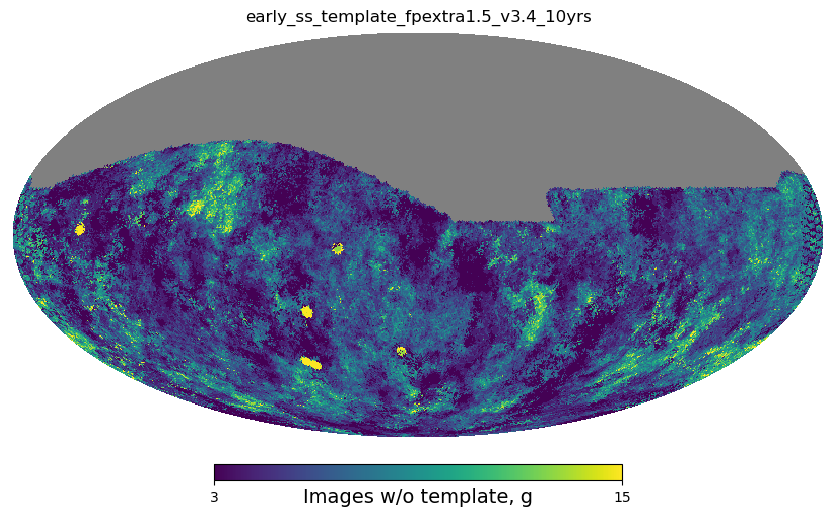

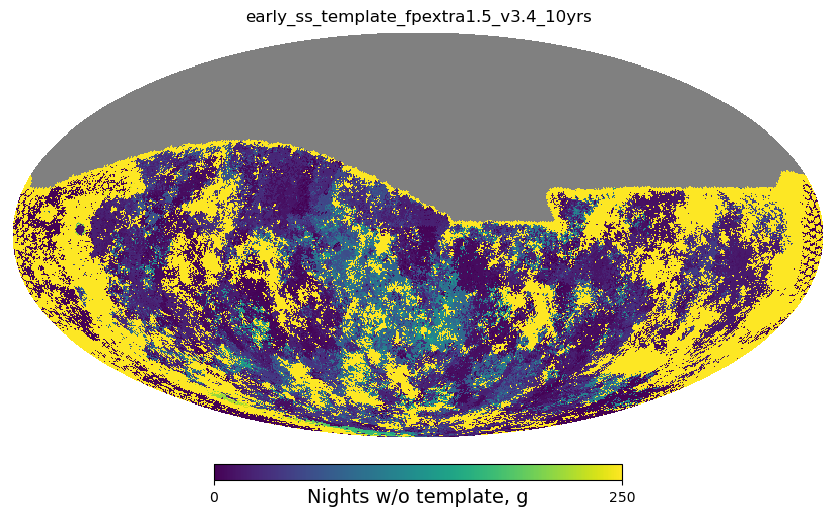

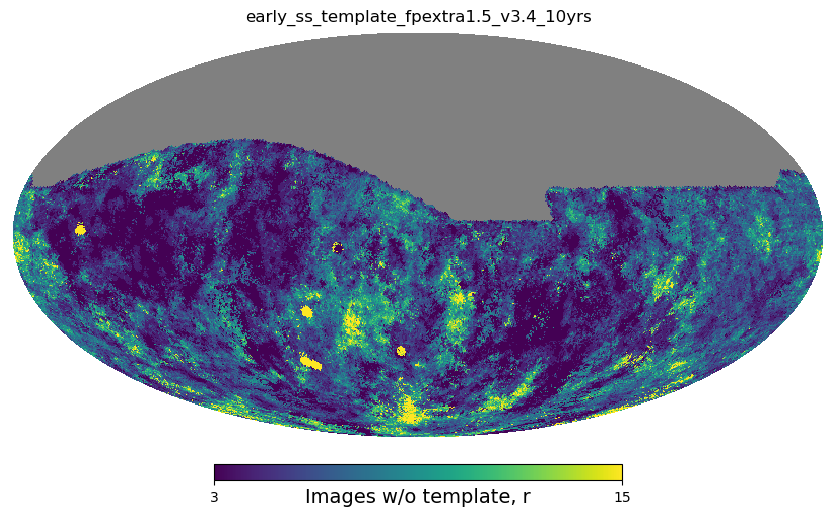

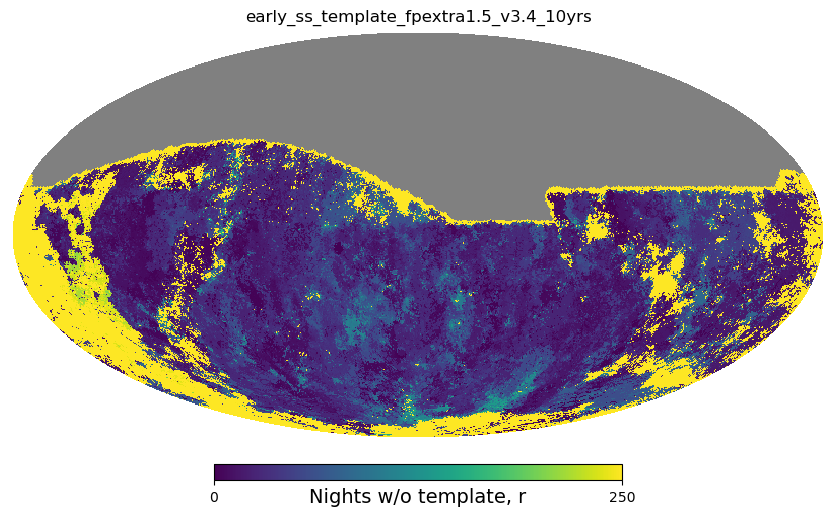

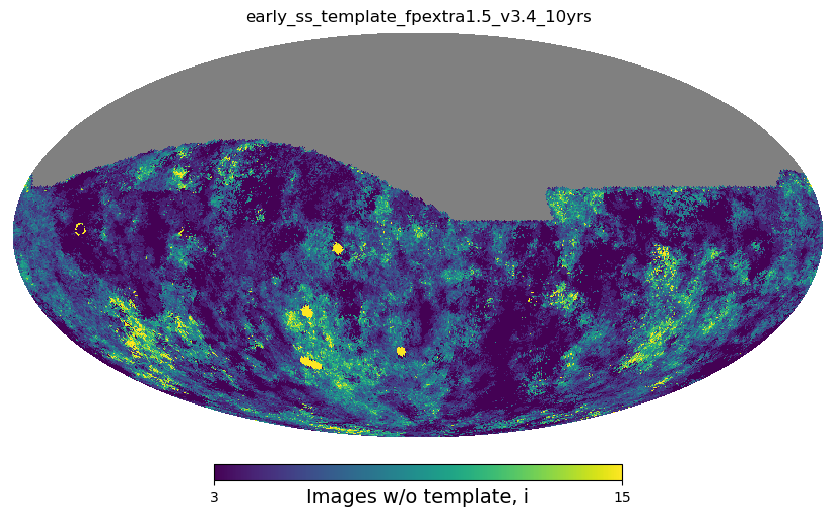

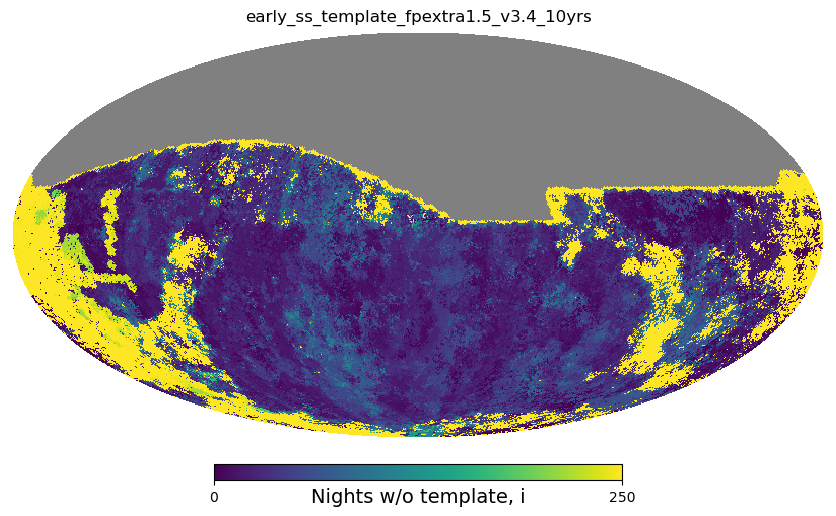

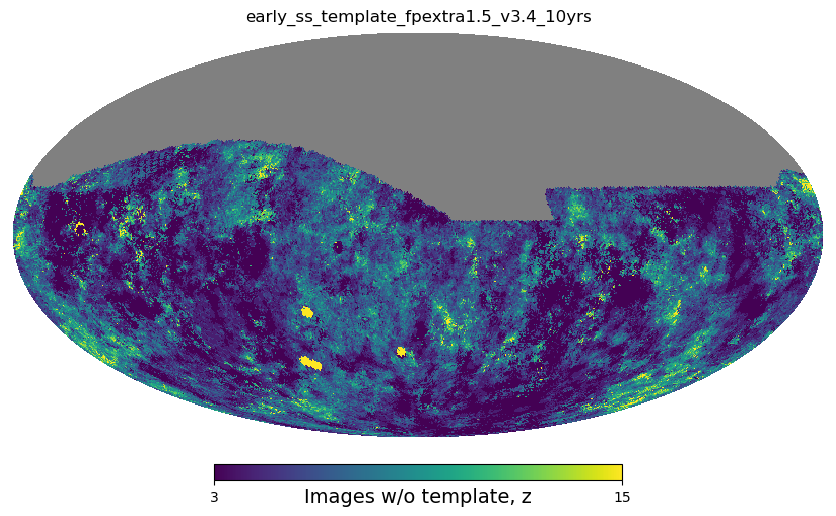

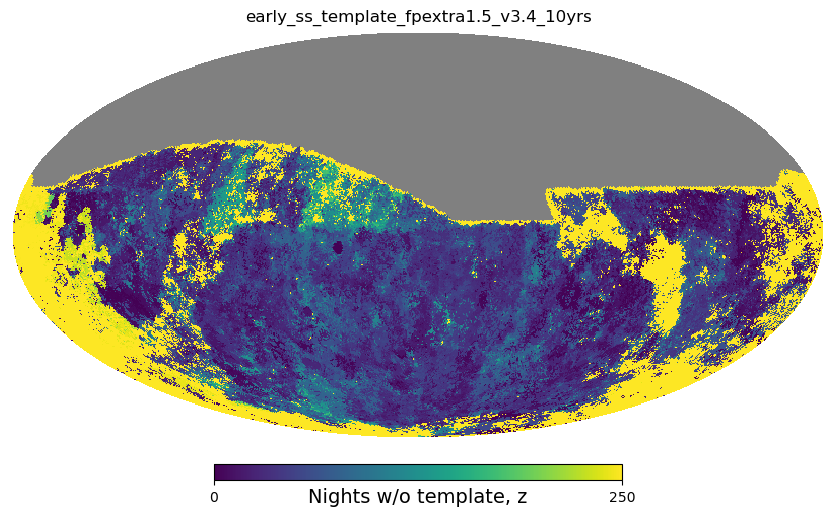

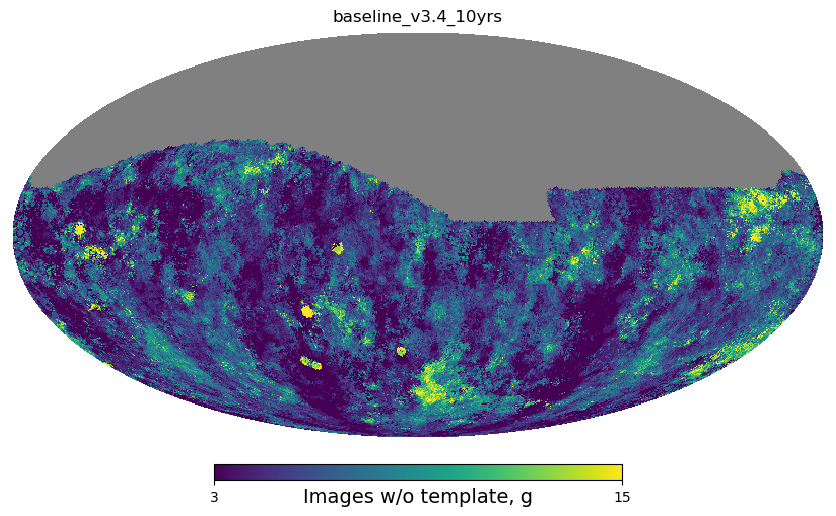

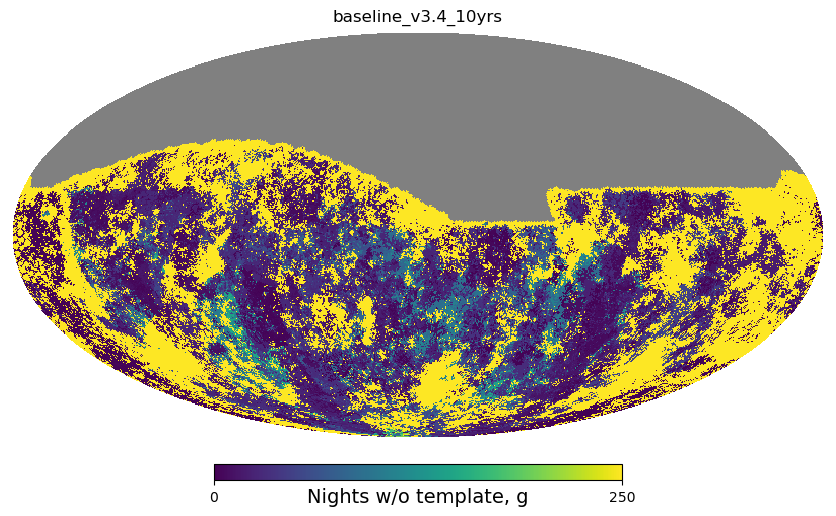

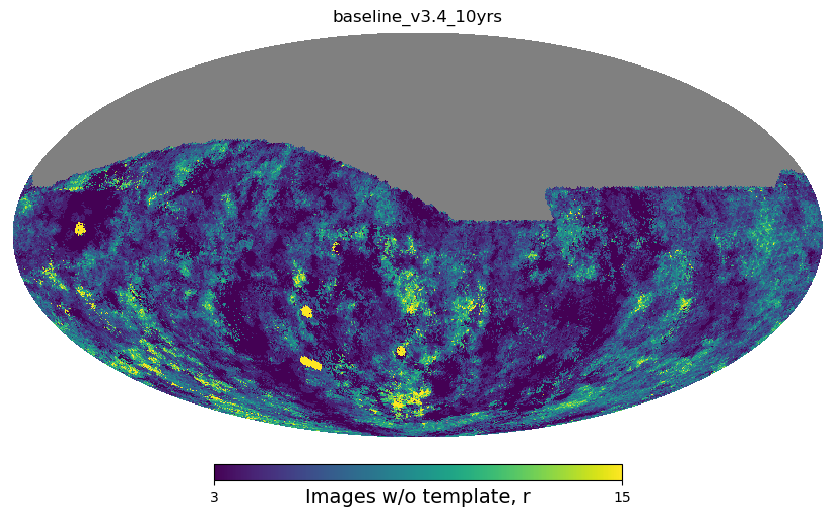

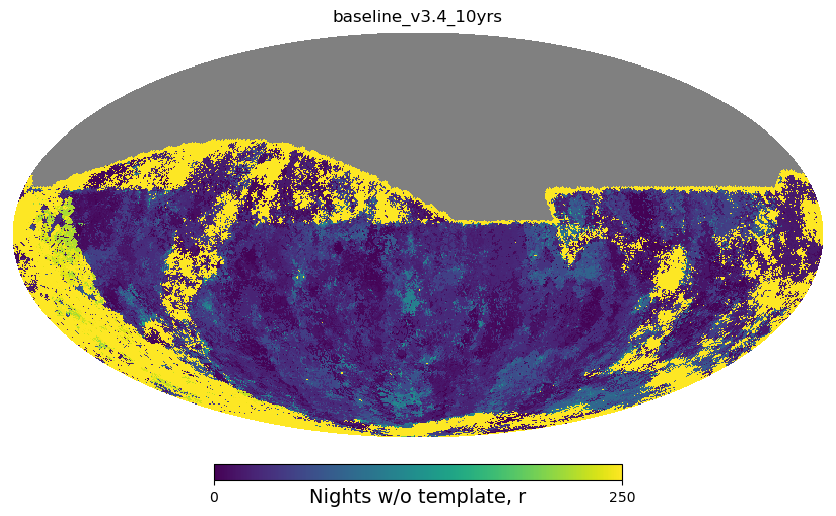

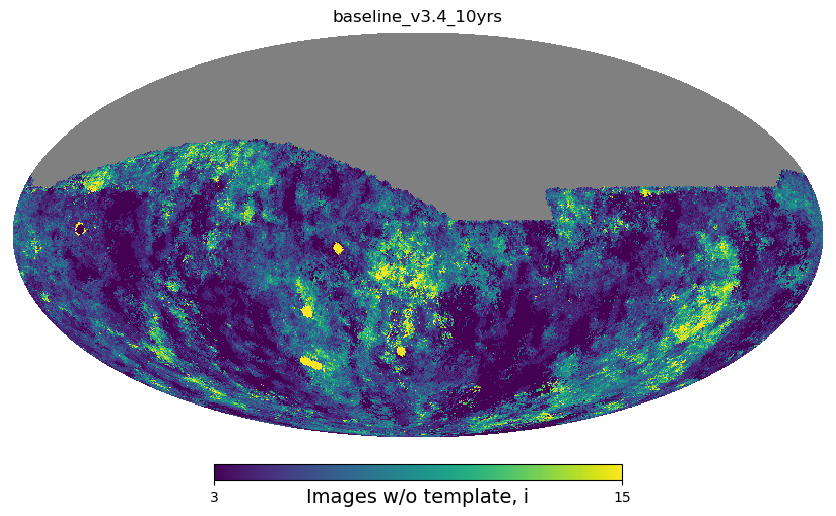

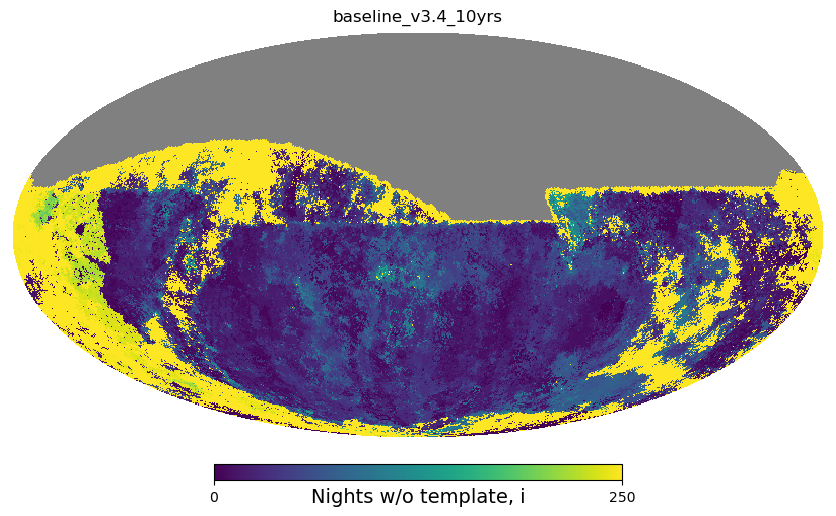

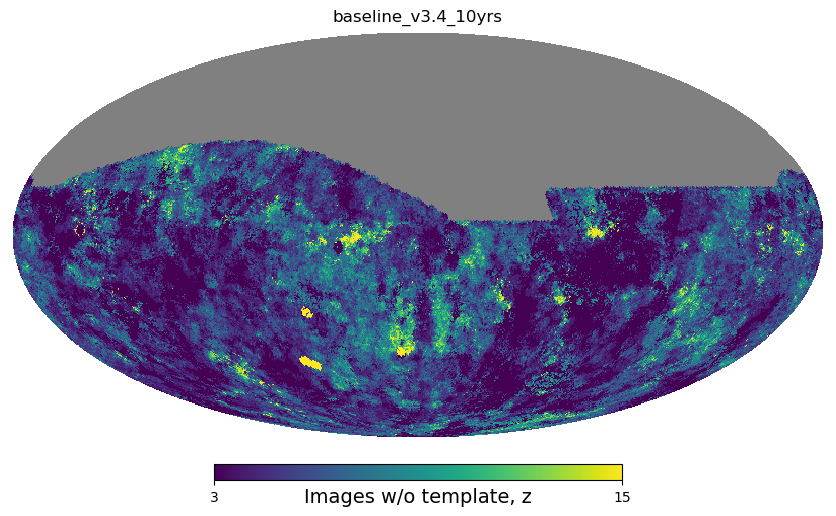

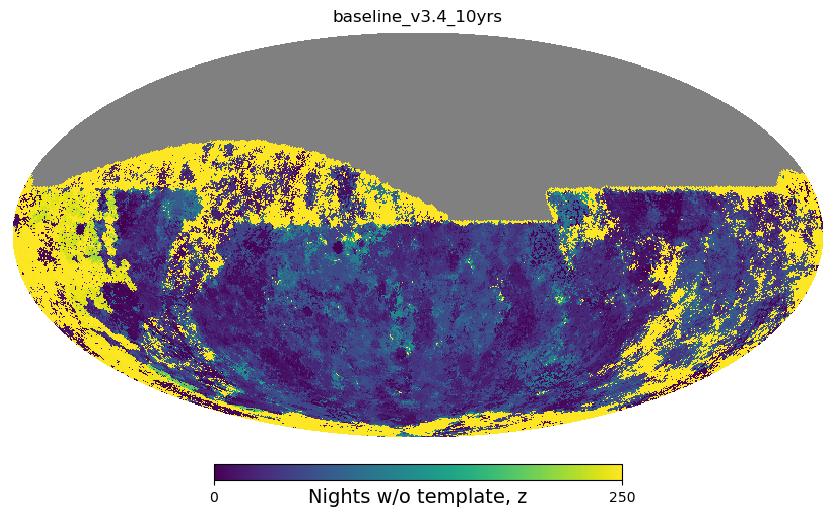

In [8]:
for filename in files:
    run_name = os.path.basename(filename).replace('.db', '')
    filters = ['g', 'r', 'i', 'z']
    plot_dict = {'color_max': 200}
    for filtername in filters:
        bundle_list = []
        metric = maf.TemplateTime()
        slicer = maf.HealpixSlicer()
        summary_stats = [maf.MedianMetric()]
        sql = "filter = '%s' and visitExposureTime > 19" % filtername
        bundle_list.append(maf.MetricBundle(metric, slicer, sql, run_name=run_name, summary_metrics=summary_stats, plot_dict=plot_dict))
        bd = maf.metricBundles.make_bundles_dict_from_list(bundle_list)
        bg = maf.metricBundles.MetricBundleGroup(bd, filename, out_dir=out_dir, results_db=results_db)
        bg.run_all()
        #bg.plot_all(closefigs=False)
        hp.mollview(bd['TemplateTime_N_images_until_template'].metric_values,
            max=15, unit="Images w/o template, %s" % filtername, title=run_name)
        hp.mollview(bd['TemplateTime_N_nights_without_template'].metric_values,
            max=250, unit="Nights w/o template, %s" % filtername, title=run_name)


In [10]:
bd

{'baseline_v3_4_10yrs_TemplateTime_z_and_visitExposureTime_gt_19_HEAL': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x2a2d02490>,
 'TemplateTime_N_images_until_template': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x2b8f0a4d0>,
 'TemplateTime_N_images_with_template': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x12ba55650>,
 'TemplateTime_N_nights_without_template': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x38f191a50>,
 'TemplateTime_Night_template_created': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x2b3035310>,
 'TemplateTime_Template_m5': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x2b3034ed0>,
 'TemplateTime_Template_seeing': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x2b3037f10>,
 'TemplateTime_Total_alerts': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x2a3b08450>,
 'TemplateTime_fraction_better_template_seeing': <rubin_sim.maf.metric_bundles.m

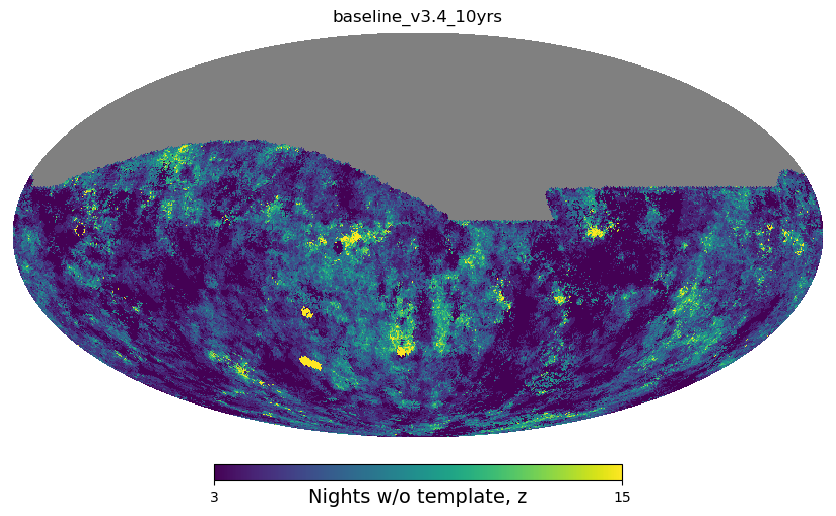

In [11]:
hp.mollview(bd['TemplateTime_N_images_until_template'].metric_values,
            unit="Nights w/o template, %s" % filtername, title=run_name, max=15)